In [3]:
import time
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [7]:
import os
max_workers = os.cpu_count() 
max_workers

48

In [5]:
water_data = pd.read_csv(r'/workspace/Simple_NIRs_simulation/data/water_data.csv',usecols=['lambda', 'mu_a'])

In [13]:
# Load water absorption data
# df = pd.read_csv('/home/bruno/Desktop/keorkle/Brain Reading/code/data/water_data.csv', header=0)
df = pd.read_csv('/workspace/Simple_NIRs_simulation/data/ext_water.csv', header=0)
# Rename columns
# df = df.rename(columns={'mu_a': 'mu_a_water'}).drop(columns=['Unnamed: 0'])


# Define piecewise multiplier function
def skull_multiplier(lam):
    # lam in nm
    if lam <= 950:
        return 100
    elif lam <= 1400:
        return 10
    else:
        return 0.3

# Vectorize multiplier

multipliers = [skull_multiplier(lam) for lam in df['lambda']]


# Compute skull absorption
df['mu_a_skull'] = pd.DataFrame(   [mu * multipliers[i] for i,mu in enumerate(df['mu_a_water'])]    )


df = df.drop(columns=['Unnamed: 0'])

water_skull_data = df


water_skull_data.tail()

,lambda,mu_a_water,mu_a_skull
325,1.822326e+06,110.709126,33.212738
326,1.865207e+06,109.728960,32.918688
327,1.909097e+06,108.742021,32.622606
328,1.954020e+06,107.748686,32.324606
329,2.000000e+06,106.749326,32.024798


In [4]:
water_skull_data.head()

,lambda,mu_a_water,mu_a_skull
0,200.0,0.0690,6.90
1,225.0,0.0274,2.74
2,250.0,0.0168,1.68
3,275.0,0.0107,1.07
4,300.0,0.0067,0.67


In [39]:
freqs = water_skull_data['lambda'].to_numpy()
vals = water_skull_data['mu_a_water'].to_numpy()

In [40]:
start = 2000000      # nm
stop  = 20000000    # nm
num = 100             # number of steps, adjust as needed

lambda_addition = np.logspace(np.log10(start), np.log10(stop), num)[1:]
print(lambda_addition)

[ 2047062.04379805  2095231.50557933  2144534.44402065  2194997.53098611
  2246648.06595605  2299513.99079547  2353623.90487     2409007.08051756
  2465693.47888413  2523713.76613204  2583099.33002977  2643882.29693206
  2706095.54915962  2769772.74278775  2834948.32585361  2901657.55699188
  2969936.52450893  3039822.16590587  3111352.28786094  3184565.58668219
  3259501.66924129  3336201.07440012  3414705.29494138  3495056.80001537
  3577299.05811487  3661476.56059074  3747634.84572077  3835820.52334498
  3926081.30008055  4018466.00513009  4113024.6166973   4209808.28902404
  4308869.38006376  4410261.47980609  4514039.43926784  4620259.40016632
  4728978.82529081  4840256.52958877  4954152.71198342  5070728.98794022
  5190048.42279948  5312175.56589337  5437176.48546588  5565118.80441425
  5696071.73687161  5830106.12565035  5967294.48056668  6107711.01766683
  6251431.69937647  6398534.27559477  6549098.32575546  6703205.30187768
  6860938.57262984  7022383.46843027  7187627.32760

In [44]:
vals_extended = np.concatenate((vals,vals[-99:]), axis=0)
freqs_extended = np.concatenate((freqs,lambda_addition), axis=0)

In [51]:
vals = vals_extended
freqs = freqs_extended

water_skull_data = pd.DataFrame([])
water_skull_data['lambda'] = freqs
water_skull_data['mu_a_water'] = vals

df = water_skull_data

def skull_multiplier(lam):
    # lam in nm
    if lam <= 950:
        return 100
    elif lam <= 1400:
        return 10
    else:
        return 0.3

# Vectorize multiplier

multipliers = [skull_multiplier(lam) for lam in df['lambda']]


# Compute skull absorption
df['mu_a_skull'] = pd.DataFrame(   [mu * multipliers[i] for i,mu in enumerate(df['mu_a_water'])]    )




water_skull_data = df


water_skull_data.tail()

,lambda,mu_a_water,mu_a_skull
424,1.822326e+07,110.709126,33.212738
425,1.865207e+07,109.728960,32.918688
426,1.909097e+07,108.742021,32.622606
427,1.954020e+07,107.748686,32.324606
428,2.000000e+07,106.749326,32.024798


In [52]:
pd.DataFrame.to_csv(water_skull_data, '/workspace/Simple_NIRs_simulation/data/super_extended_water_skull_data.csv')

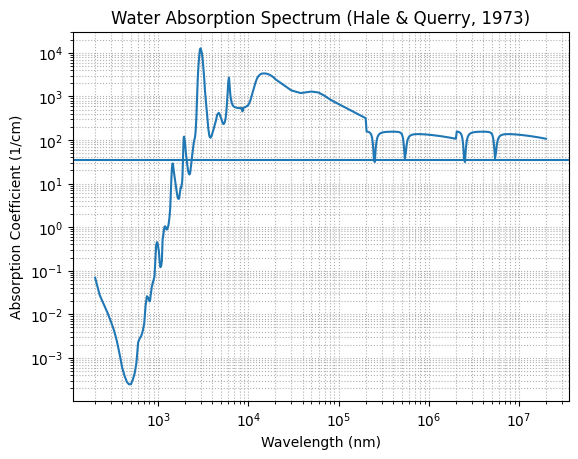

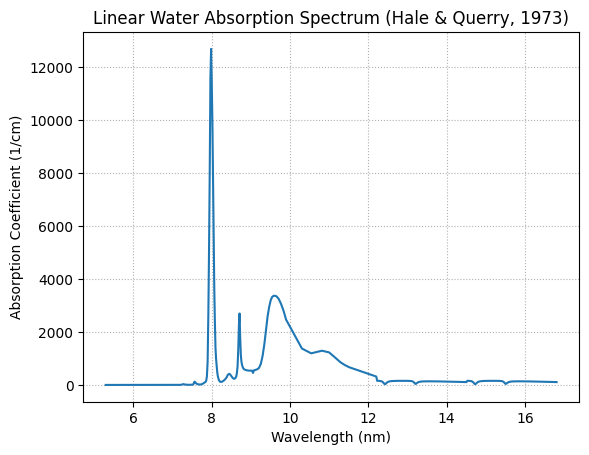

In [46]:
plt.loglog(freqs,vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.axhline(35)
plt.title('Water Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()


plt.plot([np.log(x) for x in freqs], vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.title('Linear Water Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()

In [7]:
water_skull_data.columns

Index(['lambda', 'mu_a_water', 'mu_a_skull'], dtype='object')

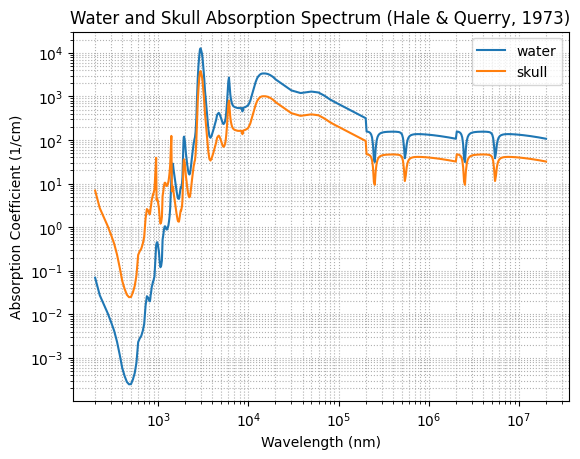

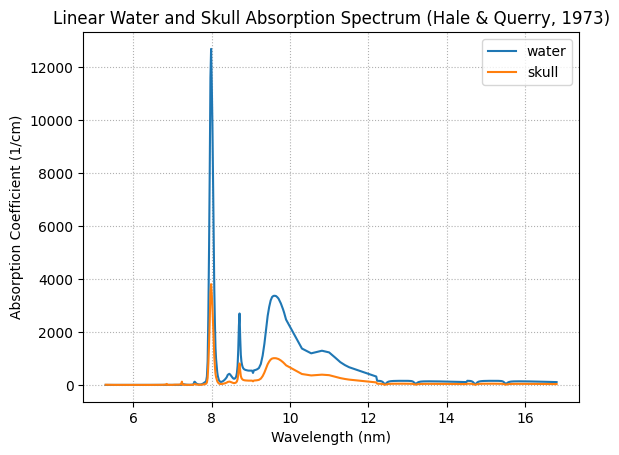

In [53]:
plt.loglog(water_skull_data['lambda'],water_skull_data['mu_a_water'], label='water')
plt.loglog(water_skull_data['lambda'],water_skull_data['mu_a_skull'], label='skull')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.legend()
plt.title('Water and Skull Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()


plt.plot([np.log(x) for x in water_skull_data['lambda']], water_skull_data['mu_a_water'], label='water')
plt.plot([np.log(x) for x in water_skull_data['lambda']], water_skull_data['mu_a_skull'], label='skull')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.legend()
plt.title('Linear Water and Skull Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()

### CURRENT MODEL

In [9]:
def plot_spectrum(y, label = 'Max Detectable Depth mm', log = True):
    # your existing plot

    if log:
        plt.loglog(water_skull_data['lambda'], y, label=label)
        plt.loglog(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)
    else:
        plt.plot(water_skull_data['lambda'], y, label=label)
        plt.plot(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)



    

    # define band limits (all λ in nm)
    bands = {
        'VIS–NIR (650–950 nm)':   (650,   950,   'C0'),
        'SWIR (950–1450 nm)':     (950,  1450,   'C1'),
        'Mid-IR (1450–25000 nm)': (1450,25000,   'C2'),
        'Microwave (≥1 mm)':      (1e6,  1e7, 'C3'),
    }

    for name, (λ0, λ1, color) in bands.items():
        plt.axvspan(λ0, λ1, color=color, alpha=0.2, label=name)

    # horizontal lines at 1 mm and 2 mm
    plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label='1 mm depth', alpha=0.4)
    plt.axhline(2.0, color='k', linestyle='-.', linewidth=1, label='2 mm depth', alpha=0.4)

    plt.axvline(1000000, color='b', linestyle='--', linewidth=1, label='1 mm lambda', alpha=0.4)
    plt.axvline(2000000, color='b', linestyle='-.', linewidth=1, label='2 mm lambda', alpha=0.4)

    plt.axvline(5500, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(3800, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(2188, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(750, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.xlabel('Wavelength (nm)')
    plt.ylabel(label)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

In [ ]:
def get_thermal_coefficient(
    mu_a: float,
    rho: float = 1040,
    c_p: float = 3650
) -> float:
    """
    Compute thermal coefficient for brain tissue that converts irradiance to
    heating rate (dT/dt) per unit irradiance [K per (W/m²·s)].

    Parameters
    ----------
    mu_a : float
        Absorption coefficient at the wavelength of interest [m⁻¹].
    rho : float
        Tissue density [kg/m³]. Default ~1040 for brain.
    c_p : float
        Specific heat capacity [J/(kg·K)]. Default ~3650 for brain.

    Returns
    -------
    thermal_coeff : float
        Heating rate per irradiance [K/(W/m²·s)].
    """
    # dT/dt = mu_a * I / (rho * c_p)  => thermal_coeff = mu_a/(rho*c_p)
    return mu_a / (rho * c_p)



def max_detectable_depth(
    I0: float,
    exposure_time: float,
    mu_a_brain: float,
    skull: bool = False,
    mu_a_skull: float = None,
    skull_thickness_mm: float = 6,
    NEP: float = 1e-14,
    pulse_snr_boost: float = None,
    threshold_signal: float = None
) -> dict:
    """
    Estimate the maximum one-way brain depth at which a returned optical signal
    remains above the detection threshold of a modern photodetector.

    Parameters
    ----------
    I0 : float
        Incident irradiance (power per area) on tissue [W/m²].
    exposure_time : float
        Total exposure/integration time [s].
    mu_a_brain : float
        Brain absorption coefficient at the wavelength of interest [m⁻¹].
    skull : bool, optional
        Whether to include skull attenuation (default: False).
    mu_a_skull : float, optional
        Skull absorption coefficient [m⁻¹] (required if skull=True).
    skull_thickness_mm : float, optional
        Skull thickness [mm] (required if skull=True).
    NEP : float, optional
        Noise Equivalent Power of detector [W/√Hz] (default 1e-12 W/√Hz citeturn0search4).
    threshold_signal : float, optional
        Absolute minimum detectable signal energy per unit area [J/m²].
        If None, computed from NEP and exposure_time:
            noise_bandwidth ≈ 1 / exposure_time  [Hz]
            threshold_power = NEP * √noise_bandwidth  [W/m²]
            threshold_signal = threshold_power * exposure_time  [J/m²]

    Returns
    -------
    dict
        - max_depth_mm: maximum detectable one-way depth [mm]
        - threshold_signal_J_m2: signal-energy threshold used [J/m²]
        - F_skull: round-trip skull transmission factor (if skull=True)
        - status: "OK" or reason why no detection possible
    """
    # Compute or validate threshold_signal [J/m²]
    if threshold_signal is None:
        assert False, 'AAAAAAAAAH'
        # Approximate noise-equivalent minimum detectable power [W/m²]
        noise_bandwidth = 1.0 / exposure_time
        threshold_power = NEP * np.sqrt(noise_bandwidth)
        threshold_signal = threshold_power * exposure_time


    if pulse_snr_boost is not None:

        assert False, 'AAAAAAAAAH'

        threshold_power = NEP * np.sqrt(noise_bandwidth) / pulse_snr_boost
        threshold_signal = threshold_power * exposure_time


        threshold_signal   = threshold_signal / pulse_snr_boost

                
                

    # Compute round-trip skull factor
    F_skull = 1.0
    if skull:
        if mu_a_skull is None or skull_thickness_mm is None:
            raise ValueError("mu_a_skull and skull_thickness_mm must be set if skull=True.")
        skull_thickness_m = skull_thickness_mm * 1e-3
        # Round-trip through skull
        F_skull = np.exp(-2 * mu_a_skull * skull_thickness_m)

    # Compute total incident energy per area
    E_incident = I0 * exposure_time  # [J/m²]

    # Check if any detection is possible
    if E_incident * F_skull <= threshold_signal:
        return {
            "max_depth_mm": 0.0,
            "threshold_signal_J_m2": threshold_signal,
            "F_skull": F_skull,
            "status": "No depth: incident×skull < threshold"
        }

    # Solve for depth: E_signal(depth) = E_incident * F_skull * exp(-2 μ_a_brain d) ≥ threshold_signal
    # ⇒ exp(-2 μ_a_brain d) ≥ threshold_signal / (E_incident * F_skull)
    frac_required = threshold_signal / (E_incident * F_skull)
    max_depth_m = -np.log(frac_required) / (2 * mu_a_brain)
    max_depth_mm = max_depth_m * 1e3

    return {
        "max_depth_mm": max_depth_mm,
        "threshold_signal_J_m2": threshold_signal,
        "F_skull": F_skull,
        "status": "OK"
    }


def optimize_pulse_schedule(
    wavelength: float,
    amplitude_grid: np.ndarray,
    mu_a_brain: float,
    pulse_freq_grid = np.logspace(3, 9, 50),
    pulse_duration_grid= np.logspace(-14, -9, 50),
    skull: bool = False,
    mu_a_skull: float = None,
    skull_thickness_mm: float = None,
    NEP: float = 1e-12,
    arrhenius_threshold: float = 0.00321,
    arrhenius_threshold_pulse: float = None,
    max_stimulation_per_trial: float = 8.,
    tau_brain: float = 2.,
    verbose: bool = False,
    num_loops: int = None
) -> dict:
    """
    Optimize pulse amplitude & repetition rate for maximum penetration depth
    under an Arrhenius damage limit, accounting for wavelength-specific
    absorption in thermal modeling.

    Parameters
    ----------
    wavelength : float
        Laser wavelength (m).
    amplitude_grid : array-like
        Photon flux values to test [photons/m²/s].
    pulse_freq_grid : array-like
        Laser repetition rates to test (Hz).
    duty : float
        Fraction of each cycle the laser is ON (0 < duty ≤ 1).
    mu_a_brain : float
        Brain absorption coefficient at this wavelength [m⁻¹].
    skull, mu_a_skull, skull_thickness_mm, NEP : see depth function.
    arrhenius_threshold : float
        Maximum allowed Arrhenius damage integral Ω.
    max_time : float
        Upper cap on exposure time (s).

    Returns
    -------
    dict
        {
          'optimal_amplitude': float,  # photon flux
          'optimal_freq': float,       # Hz
          'optimal_duty': float,
          'max_exposure_time': float,
          'max_depth_mm': float,
          'omega': float
        }
    """
    if arrhenius_threshold_pulse is None:
        arrhenius_threshold_pulse = arrhenius_threshold



    best = {
        'optimal_amplitude': None,
        'optimal_freq':      None,
        'max_exposure_time': 0.0,
        'max_depth_mm':      0.0,
        'omega':             None,
        'max_cycles':          0,
        'max_time':            0
    }

    Ω_threshold = arrhenius_threshold
    Ω_threshold_pulse = arrhenius_threshold_pulse

    # Photon energy (J per photon)
    E_photon      = h * c / wavelength
    thermal_coeff = get_thermal_coefficient(mu_a_brain)

    idx_max = len(amplitude_grid) * len(pulse_freq_grid) * len(pulse_duration_grid)
    # Sweep amplitude and repetition rate
    for amplitude in amplitude_grid:

        I0_peak = amplitude * E_photon  # surface irradiance [W/m²]

        for freq in pulse_freq_grid:

            for idx, pulse_dt in enumerate(pulse_duration_grid):

                if idx == 0 and verbose:
                    before = time.time()

                # Compute pulse on-time
                if pulse_dt * freq > 1:
                    print('A pulse duration is too long to fit a second a the given freq')
                    continue

                average_time_on   = pulse_dt * freq         # s

                # Average Irradiance at brain surface
                I0_avg = I0_peak * average_time_on  

                dT_peak = I0_peak * thermal_coeff

                T_pulse_increase = dT_peak * pulse_dt

              

                T0 = 309.85

                T = T0

                # dt_off = (freq * pulse_dt) / (freq-1)

                period = 1.0/freq
                dt_off = period - pulse_dt


                N_max = max_stimulation_per_trial * freq

                t_max = 0

                Ω_pulse = 0

                #for cycle in range(int(N_max)):
                n_cycles_used = 0

                for cycle in range(int(min(N_max, 5000))):

                    n_cycles_used += 1

                    # 1) Heat: assume nearly constant T during the short on‐pulse
                   
                    T += T_pulse_increase

                    t_max += pulse_dt
                    
                    # Integrate Arrhenius over the on‐time
                    k_on = A_arr * exp(-Ea_arr/(R_gas * T))  #TODO check R gas
                    Ω_pulse += k_on * pulse_dt
                    
                    # Break if damage limit reached
                    if Ω_pulse >= Ω_threshold_pulse:
                        break
                    
                    # 2) Cool during the off‐time (exponential decay toward baseline)
                    T = T0 + (T - T0) * exp(-dt_off / tau_brain)
                
                max_cycles = Ω_threshold / Ω_pulse

                pulse_snr_boost   = np.sqrt(n_cycles_used)

                # Compute penetration depth
                noise_bandwidth = 1.0 / t_max
                threshold_power = NEP * np.sqrt(noise_bandwidth) / pulse_snr_boost
                threshold_signal = threshold_power * t_max



       
                res   = max_detectable_depth(
                    I0_avg, t_max, mu_a_brain,  # Should I use I0_avg here or something else?
                    skull, mu_a_skull, skull_thickness_mm,
                    NEP, threshold_signal=threshold_signal
                )
                depth = res['max_depth_mm']
         

                # Update if improved
                if depth > best['max_depth_mm']:
                    best.update({
                        'optimal_amplitude': amplitude,
                        'optimal_freq':      freq,
                        'max_exposure_time': t_max,
                        'max_depth_mm':      depth,
                        'omega':             Ω_pulse,
                        'max_cycles':       max_cycles,
                        'max_time':         max_cycles * max_stimulation_per_trial
                    })

                if idx == 0 and verbose:
                    comp_duration = time.time() - before
                    print(f"Cycle duration is {comp_duration} seconds")

                    print(f"Expected total compute duration is {idx_max * comp_duration * num_loops // 60 / 60} hours, or {idx_max * comp_duration * num_loops // 60 } minutes")
                    verbose = False

    return best

In [42]:
# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)



amplitude_grid = np.logspace(18, 25, 3)
pulse_freq_grid = np.logspace(3, 9, 3)
pulse_duration_grid= np.logspace(-14, -9, 3)

arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 8

tau_brain = 2

results = []

verbose = True
num_wavelengths = len(water_skull_data['lambda'])
for i, (wavelength, mu_water, mu_skull) in enumerate(water_skull_data.values):

    if i==0: before = time.time()

    result = optimize_pulse_schedule(wavelength=wavelength, amplitude_grid=amplitude_grid,
                                      mu_a_brain=mu_water*100,
                                      pulse_freq_grid = pulse_freq_grid,
                                      pulse_duration_grid = pulse_duration_grid,
                                      skull = True, mu_a_skull=mu_skull*100, skull_thickness_mm=6,
                                      NEP=1e-14,
                                      arrhenius_threshold=arrhenius_threshold, arrhenius_threshold_pulse=arrhenius_threshold_pulse,
                                      max_stimulation_per_trial = max_stimulation_per_trial,
                                      tau_brain = tau_brain, verbose = verbose, num_loops = num_wavelengths)

    results.append(result)
    verbose = False

    if i==0:
        duration = time.time() - before
        print(f"More accurate duration estimate is {duration} seconds per wavelength, {duration*num_wavelengths //60 } minutes \
               or {duration*num_wavelengths //60 / 60} hours in total.")
    

depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]


'''
best.update({
  'optimal_amplitude': amplitude,
  'optimal_duty': duty,
  'max_exposure_time': t_run,
  'max_depth_mm': depth,
  'omega': omega_val
})
'''


Cycle duration is 0.003285646438598633 seconds
Expected total compute duration is 0.0 hours, or 0.0 minutes
More accurate duration estimate is 0.09411764144897461 seconds per wavelength, 0.0 minutes                or 0.0 hours in total.


KeyboardInterrupt: 

In [57]:
water_skull_data = pd.read_csv('/workspace/Simple_NIRs_simulation/data/super_extended_water_skull_data.csv', header=0)

water_skull_data=water_skull_data.drop(columns='Unnamed: 0')

water_skull_data

,lambda,mu_a_water,mu_a_skull
0,2.000000e+02,0.069000,6.900000
1,2.250000e+02,0.027400,2.740000
2,2.500000e+02,0.016800,1.680000
3,2.750000e+02,0.010700,1.070000
4,3.000000e+02,0.006700,0.670000
...,...,...,...
424,1.822326e+07,110.709126,33.212738
425,1.865207e+07,109.728960,32.918688
426,1.909097e+07,108.742021,32.622606
427,1.954020e+07,107.748686,32.324606


In [47]:
import os
from concurrent.futures import ProcessPoolExecutor, as_completed

# 1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count()   # e.g. 16 on a 8‑core/16‑thread machine
print(f"Detected {max_workers} logical CPUs")
amplitude_grid = np.logspace(18, 25, 3)
pulse_freq_grid = np.logspace(3, 9, 3)
pulse_duration_grid= np.logspace(-14, -9, 3)
# 2. Build the list of argument‑dicts you want to map:
tasks = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    tasks.append({
        'wavelength': wavelength,
        'amplitude_grid': amplitude_grid,
        'mu_a_brain': mu_water * 100,
        'pulse_freq_grid': pulse_freq_grid,
        'pulse_duration_grid': pulse_duration_grid,
        'skull': True,
        'mu_a_skull': mu_skull * 100,
        'skull_thickness_mm': 5.5,
        'NEP': 1e-14,
        'arrhenius_threshold': arrhenius_threshold,
        'arrhenius_threshold_pulse': arrhenius_threshold_pulse,
        'max_stimulation_per_trial': max_stimulation_per_trial,
        'tau_brain': tau_brain,
        'verbose': False,
        'num_loops': len(water_skull_data['lambda'])
    })

# 3. Spawn a pool of worker processes:
with ProcessPoolExecutor(max_workers=14) as executor:
    futures = [executor.submit(optimize_pulse_schedule, **kw) for kw in tasks]

    results = []
    for future in as_completed(futures):
        try:
            results.append(future.result())
        except Exception as e:
            print("Worker raised:", e)
depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

Detected 16 logical CPUs


In [48]:
depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

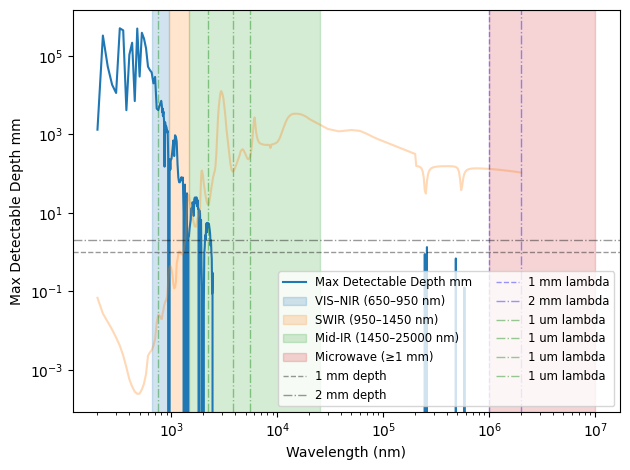

In [49]:
plot_spectrum(depths)

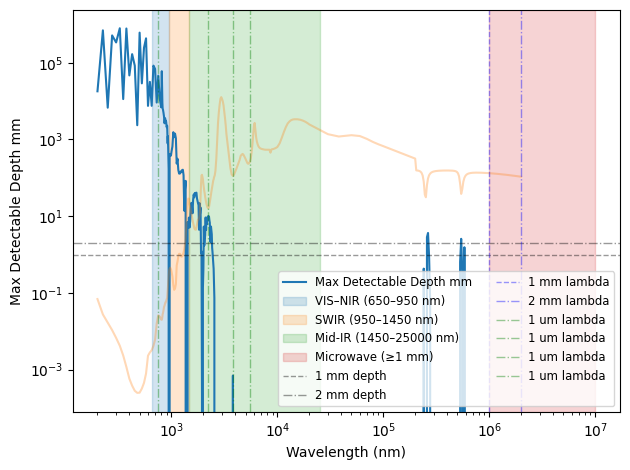

In [94]:
plot_spectrum(depths)

### Introducing scattering

### Coefficient estrapolation attempt 2

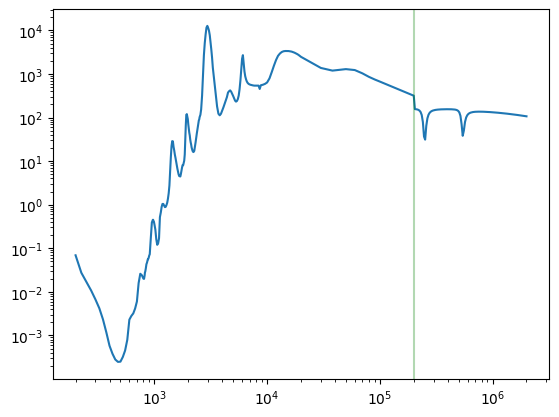

In [22]:
# Wavelength range
wavelengths_nm = np.logspace(np.log10(200000), np.log10(2000000), num=100)
wavelengths_m = wavelengths_nm * 1e-9  # nm to m
omega = 2 * np.pi * 299792458 / wavelengths_m  # angular frequency (rad/s)

# Debye relaxation (single)
eps_s = 78.36     # static permittivity
eps_inf = 3.3     # high-frequency permittivity
tau = 8.27e-12    # relaxation time (s)

# Lorentz oscillators (3)
# Parameters: strength factors f_j, resonance freq (rad/s), damping Gamma_j (rad/s)
osc_params = [
    {"f": 0.20, "omega0": 2*np.pi*0.55e12, "gamma": 0.1*(2*np.pi*0.55e12)},
    {"f": 0.10, "omega0": 2*np.pi*1.20e12, "gamma": 0.1*(2*np.pi*1.20e12)},
    {"f": 0.05, "omega0": 2*np.pi*2.00e12, "gamma": 0.1*(2*np.pi*2.00e12)}
]

# Build complex permittivity
epsilon = eps_inf + (eps_s - eps_inf) / (1 + 1j * omega * tau)
for osc in osc_params:
    s_j = osc["f"] * osc["omega0"]**2
    epsilon += s_j / (osc["omega0"]**2 - omega**2 - 1j * osc["gamma"] * omega)

# Complex refractive index
n_complex = np.sqrt(epsilon)
k = np.abs(n_complex.imag)  # ensure positive

# Absorption coefficient alpha (cm^-1)
lambda_cm = wavelengths_m * 100
alpha = 4 * np.pi * k / lambda_cm

# Create and show DataFrame
df = pd.DataFrame({
    "wavelength_nm": wavelengths_nm,
    "absorption_coefficient_cm^-1": alpha
})
ext_freqs = list(freqs) + list(df["wavelength_nm"].to_numpy())[1:]
ext_vals = list(vals) + list(df["absorption_coefficient_cm^-1"].to_numpy())[1:]


plt.loglog(ext_freqs,ext_vals)
plt.axvline(200000, color = 'green', alpha = 0.3)

plt.show()

### Adding scattering and resolution to the algorithm

In [111]:
def plot_spectrum(y, label = 'Max Detectable Depth mm', log = True):
    # your existing plot

    if log:
        plt.loglog(water_skull_data['lambda'], y, label=label)
        plt.loglog(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)
    else:
        plt.plot(water_skull_data['lambda'], y, label=label)
        plt.plot(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)



    

    # define band limits (all λ in nm)
    bands = {
        'VIS–NIR (650–950 nm)':   (650,   950,   'C0'),
        'SWIR (950–1450 nm)':     (950,  1450,   'C1'),
        'Mid-IR (1450–25000 nm)': (1450,25000,   'C2'),
        'Microwave (≥1 mm)':      (1e6,  1e7, 'C3'),
    }

    for name, (λ0, λ1, color) in bands.items():
        plt.axvspan(λ0, λ1, color=color, alpha=0.2, label=name)

    # horizontal lines at 1 mm and 2 mm
    plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label='1 mm depth', alpha=0.4)
    plt.axhline(2.0, color='k', linestyle='-.', linewidth=1, label='2 mm depth', alpha=0.4)

    plt.axvline(1000000, color='b', linestyle='--', linewidth=1, label='1 mm lambda', alpha=0.4)
    plt.axvline(2000000, color='b', linestyle='-.', linewidth=1, label='2 mm lambda', alpha=0.4)

    plt.axvline(5500, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(3800, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(2188, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(750, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.xlabel('Wavelength (nm)')
    plt.ylabel(label)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

In [112]:
import sys

def get_resolution(I0_avg, t_run, threshold_signal, pulse_snr_boost, mu_a_brain_m, mu_s_brain_p, mu_a_skull_m, mu_s_skull_p,  skull_depth_mm, depth_mm = 0.4, NEP = 1e-14):


    

    d_skull = skull_depth_mm * 1e-3
    depth   = depth_mm   * 1e-3

    # ── 1) Diffusion coefficient D = 1/[3(μₐ + μₛ′)] ───────────────────────────
    D_skull = 1.0 / (3.0 * (mu_a_skull_m   + mu_s_skull_p))
    D_brain = 1.0 / (3.0 * (mu_a_brain_m  + mu_s_brain_p))


    # ── 2) Photon time-of-flight to each layer, one‐way ──────────────────────────
    t_skull = (1.555 * d_skull) / c
    t_brain = (1.37 * depth  ) / c

    # ── 3) One-way PSF variance contributions ──────────────────────────────────
    sigma2_skull = 2.0 * D_skull * t_skull
    sigma2_brain = 2.0 * D_brain * t_brain

    # combined one-way RMS width (m)
    sigma_oneway = np.sqrt(sigma2_skull + sigma2_brain)

    # two-way adds another pass through both layers
    sigma_total = np.sqrt(2.0) * sigma_oneway

    # infinite-SNR resolution (FWHM in m)
    FWHM_inf = 2.35 * sigma_total

    # ── 4) Center-spot signal and total SNR ─────────────────────────────────────
    # Total energy delivered per area
    E_incident = I0_avg * t_run


    # Convert skull μₐ to per-m if it isn’t already:
    mu_a_skull_m   = mu_a_skull_m        # cm⁻¹ → m⁻¹
 

    # two-way transmission through skull:
    F_skull = np.exp(-2.0 * mu_a_skull_m * d_skull)

    # Energy returning at zero lateral offset
    E_center = E_incident * F_skull * np.exp(-2.0 * mu_a_brain_m * depth)

    # Total SNR including pulse averaging
    # (E_center/threshold_sig) is SNR for a single detection window
    SNR_total = (E_center / threshold_signal) * pulse_snr_boost

    #print('SNR total: ', SNR_total)

    # ── 5) Noise-limited resolution ─────────────────────────────────────────────
    # Solve exp(-r²/(2σ²)) = 1/SNR  ⇒  r_lim = σ √[2 ln(SNR)]
    if SNR_total <= 1.0:
        # no detectable spot — resolution is infinite
        FWHM_noise = np.inf
    else:
        # compute the true noise-limited radius
        r_lim      = sigma_total * np.sqrt(2.0 * np.log(SNR_total))
        FWHM_noise = 2.0 * r_lim



    return [1/(FWHM_noise*1e3), 1/(FWHM_inf*1e3)]


In [113]:
def get_thermal_coefficient(
    mu_a: float,
    rho: float = 1040,
    c_p: float = 3650
) -> float:
    """
    Compute thermal coefficient for brain tissue that converts irradiance to
    heating rate (dT/dt) per unit irradiance [K per (W/m²·s)].

    Parameters
    ----------
    mu_a : float
        Absorption coefficient at the wavelength of interest [m⁻¹].
    rho : float
        Tissue density [kg/m³]. Default ~1040 for brain.
    c_p : float
        Specific heat capacity [J/(kg·K)]. Default ~3650 for brain.

    Returns
    -------
    thermal_coeff : float
        Heating rate per irradiance [K/(W/m²·s)].
    """
    # dT/dt = mu_a * I / (rho * c_p)  => thermal_coeff = mu_a/(rho*c_p)
    return mu_a / (rho * c_p)



def max_detectable_depth(
    I0: float,
    exposure_time: float,
    mu_a_brain: float,
    mu_s_prime_brain: float,
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_prime_skull: float = None,
    skull_thickness_mm: float = 6,
    NEP: float = 1e-14,
    threshold_signal: float = None
) -> dict:
    """
    Estimate the maximum one-way brain depth at which a returned optical signal
    remains above the detection threshold of a modern photodetector.

    Parameters
    ----------
    I0 : float
        Incident irradiance (power per area) on tissue [W/m²].
    exposure_time : float
        Total exposure/integration time [s].
    mu_a_brain : float
        Brain absorption coefficient at the wavelength of interest [m⁻¹].
    skull : bool, optional
        Whether to include skull attenuation (default: False).
    mu_a_skull : float, optional
        Skull absorption coefficient [m⁻¹] (required if skull=True).
    skull_thickness_mm : float, optional
        Skull thickness [mm] (required if skull=True).
    NEP : float, optional
        Noise Equivalent Power of detector [W/√Hz] (default 1e-12 W/√Hz citeturn0search4).
    threshold_signal : float, optional
        Absolute minimum detectable signal energy per unit area [J/m²].
        If None, computed from NEP and exposure_time:
            noise_bandwidth ≈ 1 / exposure_time  [Hz]
            threshold_power = NEP * √noise_bandwidth  [W/m²]
            threshold_signal = threshold_power * exposure_time  [J/m²]

    Returns
    -------
    dict
        - max_depth_mm: maximum detectable one-way depth [mm]
        - threshold_signal_J_m2: signal-energy threshold used [J/m²]
        - F_skull: round-trip skull transmission factor (if skull=True)
        - status: "OK" or reason why no detection possible
    """

    # Compute round-trip skull factor
    F_skull = 1.0
    if skull:
        if mu_a_skull is None or skull_thickness_mm is None:
            raise ValueError("mu_a_skull and skull_thickness_mm must be set if skull=True.")
        skull_thickness_m = skull_thickness_mm * 1e-3
        # Round-trip through skull
        F_skull = np.exp(-2 * mu_a_skull * skull_thickness_m)

    # Compute total incident energy per area
    E_incident = I0 * exposure_time  # [J/m²]

    # Check if any detection is possible
    if E_incident * F_skull <= threshold_signal:
        return {
            "max_depth_mm": 0.0,
            "threshold_signal_J_m2": threshold_signal,
            "F_skull": F_skull,
            "status": "No depth: incident×skull < threshold"
        }

    # Solve for depth: E_signal(depth) = E_incident * F_skull * exp(-2 μ_a_brain d) ≥ threshold_signal
    # ⇒ exp(-2 μ_a_brain d) ≥ threshold_signal / (E_incident * F_skull)
    frac_required = threshold_signal / (E_incident * F_skull)
    max_depth_m = -np.log(frac_required) / (2 * mu_a_brain)
    max_depth_mm = max_depth_m * 1e3

    return {
        "max_depth_mm": max_depth_mm,
        "threshold_signal_J_m2": threshold_signal,
        "F_skull": F_skull,
        "status": "OK"
    }


def optimize_pulse_schedule(
    wavelength: float,
    amplitude_grid: np.ndarray,
    mu_a_brain: float,
    mu_s_brain_p: float,
    pulse_freq_grid = np.logspace(3, 9, 50),
    pulse_duration_grid= np.logspace(-14, -9, 50),
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_skull_p: float = None,
    skull_thickness_mm: float = None,
    NEP: float = 1e-14,
    arrhenius_threshold: float = 0.00321,
    arrhenius_threshold_pulse: float = None,
    max_stimulation_per_trial: float = 8.,
    tau_brain: float = 2.,
    verbose: bool = False,
    num_loops: int = None
) -> dict:
    """
    Optimize pulse amplitude & repetition rate for maximum penetration depth
    under an Arrhenius damage limit, accounting for wavelength-specific
    absorption in thermal modeling.

    Parameters
    ----------
    wavelength : float
        Laser wavelength (m).
    amplitude_grid : array-like
        Photon flux values to test [photons/m²/s].
    pulse_freq_grid : array-like
        Laser repetition rates to test (Hz).
    duty : float
        Fraction of each cycle the laser is ON (0 < duty ≤ 1).
    mu_a_brain : float
        Brain absorption coefficient at this wavelength [m⁻¹].
    skull, mu_a_skull, skull_thickness_mm, NEP : see depth function.
    arrhenius_threshold : float
        Maximum allowed Arrhenius damage integral Ω.
    max_time : float
        Upper cap on exposure time (s).

    Returns
    -------
    dict
        {
          'optimal_amplitude': float,  # photon flux
          'optimal_freq': float,       # Hz
          'optimal_duty': float,
          'max_exposure_time': float,
          'max_depth_mm': float,
          'omega': float
        }
    """
    if arrhenius_threshold_pulse is None:
        arrhenius_threshold_pulse = arrhenius_threshold



    best = {
        'optimal_amplitude': None,
        'optimal_freq':      None,
        'max_exposure_time': 0.0,
        'max_depth_mm':      0.0,
        'omega':             None,
        'max_trials':          0,
        'max_time':            0,
        'res_0_depth':         [0,0],
        'res_04_depth':         [0,0],
        'res_max_depth':         [0,0]
    }

    Ω_threshold = arrhenius_threshold
    Ω_threshold_pulse = arrhenius_threshold_pulse

    # Photon energy (J per photon)
    E_photon      = h * c / wavelength
    thermal_coeff = get_thermal_coefficient(mu_a_brain)

    idx_max = len(amplitude_grid) * len(pulse_freq_grid) * len(pulse_duration_grid)
    # Sweep amplitude and repetition rate
    for amplitude in amplitude_grid:

        I0_peak = amplitude * E_photon  # surface irradiance [W/m²]

        for freq in pulse_freq_grid:

            for idx, pulse_dt in enumerate(pulse_duration_grid):

                if idx == 0 and verbose:
                    before = time.time()

                # Compute pulse on-time
                if pulse_dt * freq > 1:
                    print('A pulse duration is too long to fit a second a the given freq')
                    continue

                average_time_on   = pulse_dt * freq         # s

                # Average Irradiance at brain surface
                I0_avg = I0_peak * average_time_on  

                dT_peak = I0_peak * thermal_coeff

                T_pulse_increase = dT_peak * pulse_dt

              

                T0 = 309.85

                T = T0

                # dt_off = (freq * pulse_dt) / (freq-1)

                period = 1.0/freq
                dt_off = period - pulse_dt


                N_max = max_stimulation_per_trial * freq

                t_max = 0

                Ω_pulse = 0

                #for cycle in range(int(N_max)):
                N_cycles_used = 0
                for cycle in range(int(min(N_max, 5000) )):
                    
                    N_cycles_used += 1


                    # 1) Heat: assume nearly constant T during the short on‐pulse
                   
                    T += T_pulse_increase

                    t_max += pulse_dt
                    
                    # Integrate Arrhenius over the on‐time
                    k_on = A_arr * exp(-Ea_arr/(R_gas * T))  #TODO check R gas
                    Ω_pulse += k_on * pulse_dt
                    
                    # Break if damage limit reached
                    if Ω_pulse >= Ω_threshold_pulse:
                        break
                    
                    # 2) Cool during the off‐time (exponential decay toward baseline)
                    T = T0 + (T - T0) * exp(-dt_off / tau_brain)
                
                max_trials = Ω_threshold / Ω_pulse

                snr_boost   = np.sqrt(N_cycles_used)

                # Compute penetration depth

                noise_bandwidth = 1.0 / t_max
                threshold_power = NEP * np.sqrt(noise_bandwidth)
                threshold_signal = threshold_power * t_max
               

             
                    
       
                res   = max_detectable_depth(I0 = I0_avg, exposure_time=t_max, mu_a_brain=mu_a_brain, mu_s_prime_brain=mu_s_brain_p,
                                             skull=skull, mu_a_skull=mu_a_skull, mu_s_prime_skull=mu_s_skull_p, skull_thickness_mm=skull_thickness_mm,
                                             NEP=NEP, threshold_signal=threshold_signal)
                depth = res['max_depth_mm']

                res_0_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.0, NEP = NEP)
                
                if depth>=0.4:

                    res_04_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.4, NEP = NEP)
                else:
                    res_04_depth = [0,0]

                res_max_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = depth, NEP = NEP)
         

                # Update if improved
                if depth > best['max_depth_mm']:
                    best.update({
                        'optimal_amplitude': amplitude,
                        'optimal_freq':      freq,
                        'max_exposure_time': t_max,
                        'max_depth_mm':      depth,
                        'omega':             Ω_pulse,
                        'max_trials':       max_trials,
                        'max_time':         max_trials * max_stimulation_per_trial,
                        'res_0_depth':         res_0_depth,
                        'res_04_depth':         res_04_depth,
                        'res_max_depth':         res_max_depth
                    })

                if idx == 0 and verbose:
                    comp_duration = time.time() - before
                    print(f"Cycle duration is {comp_duration} seconds")

                    print(f"Expected total compute duration is {idx_max * comp_duration * num_loops // 60 / 60} hours, or {idx_max * comp_duration * num_loops // 60 } minutes")
                    verbose = False

    return best

In [121]:

# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)



amplitude_grid = np.logspace(18, 25, 3)
pulse_freq_grid = np.logspace(3, 9, 3)
pulse_duration_grid= np.logspace(-14, -9, 3)

arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 8

tau_brain = 2

#           1. Figure out how many logical CPUs (hardware threads) you have:


results = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    results.append(optimize_pulse_schedule(
        wavelength= wavelength,
        amplitude_grid= amplitude_grid,
        mu_a_brain= mu_water * 100,
        mu_s_brain_p= 7 * 100,
        pulse_freq_grid= pulse_freq_grid,
        pulse_duration_grid= pulse_duration_grid,
        skull= True,
        mu_a_skull= mu_skull * 100,
        mu_s_skull_p= 7 * 100,
        skull_thickness_mm= 5,
        NEP= 1e-13,
        arrhenius_threshold= arrhenius_threshold,
        arrhenius_threshold_pulse= arrhenius_threshold_pulse,
        max_stimulation_per_trial= max_stimulation_per_trial,
        tau_brain= tau_brain,
        verbose= False,
        num_loops= len(water_skull_data['lambda'])
    ))





depths = [result['max_depth_mm'] for result in results]

res_0 = [result['res_0_depth'][0] for result in results]
res_04 = [result['res_04_depth'][0] for result in results]
res_max = [result['res_max_depth'][0] for result in results]

res_0_inf = [result['res_0_depth'][1] for result in results]
res_04_inf = [result['res_04_depth'][1] for result in results]
res_max_inf = [result['res_max_depth'][1] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]


rr = [['depths',depths], ['res_0',res_0], ['res_0_inf',res_0_inf], ['res_04',res_04],['res_04_inf',res_04_inf],
       ['res_max',res_max],['res_max_inf',res_max_inf],   ['exposures',exposures], ['times',times]]

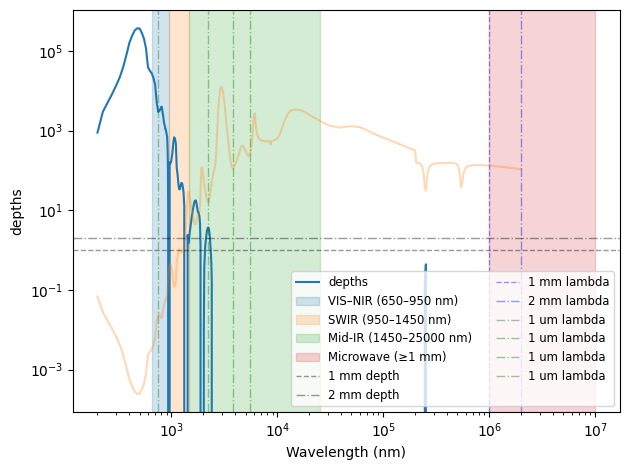

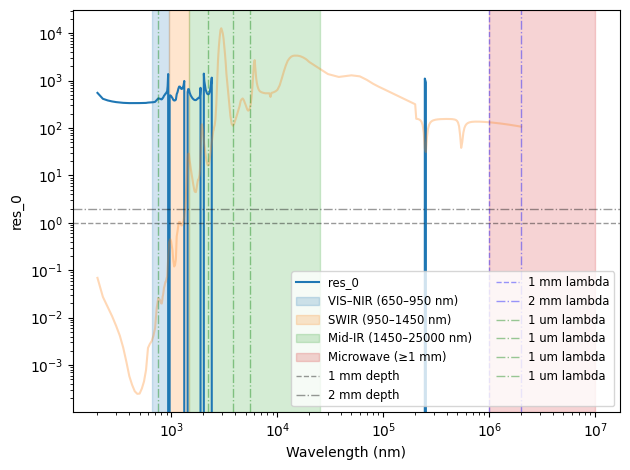

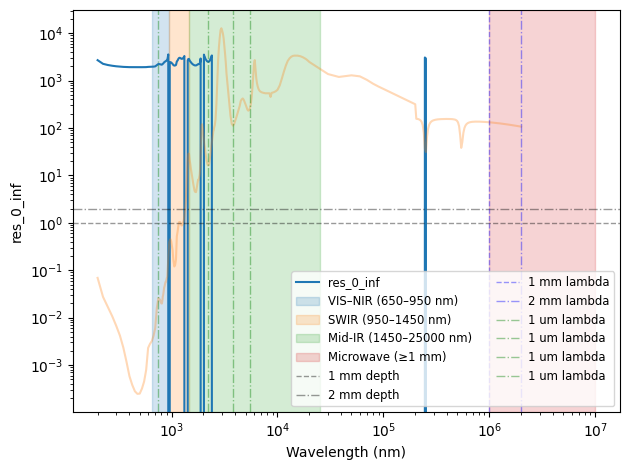

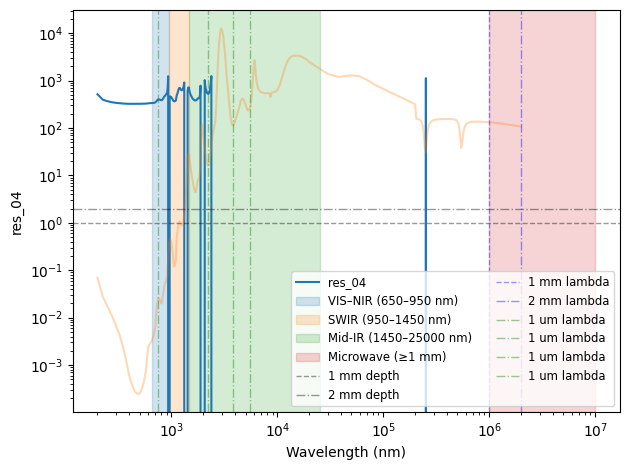

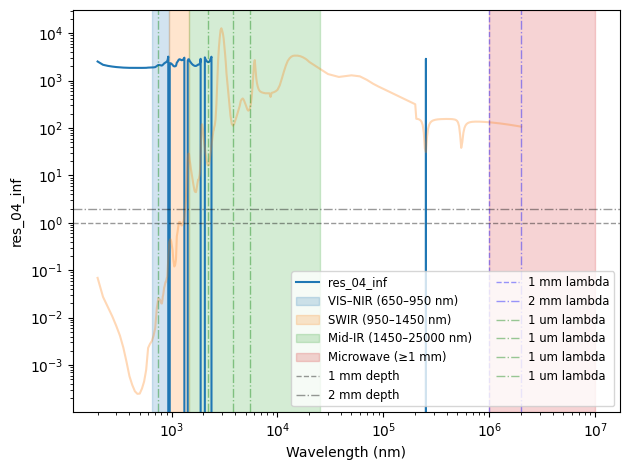

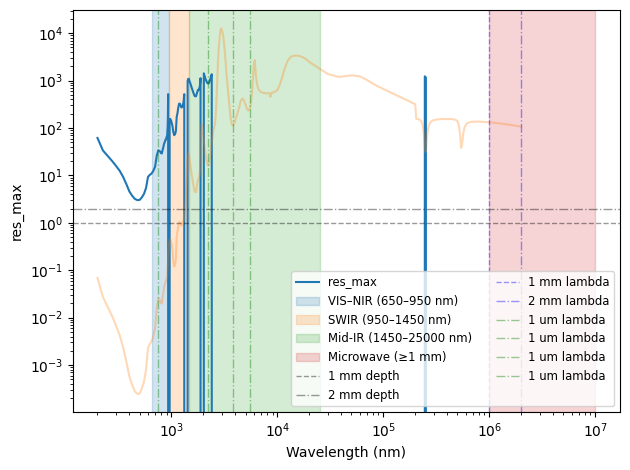

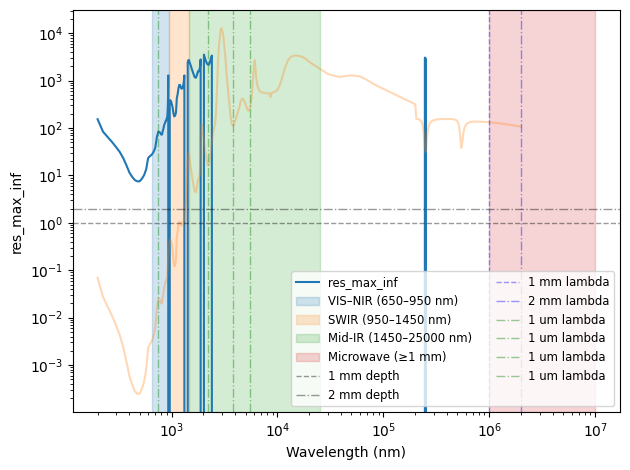

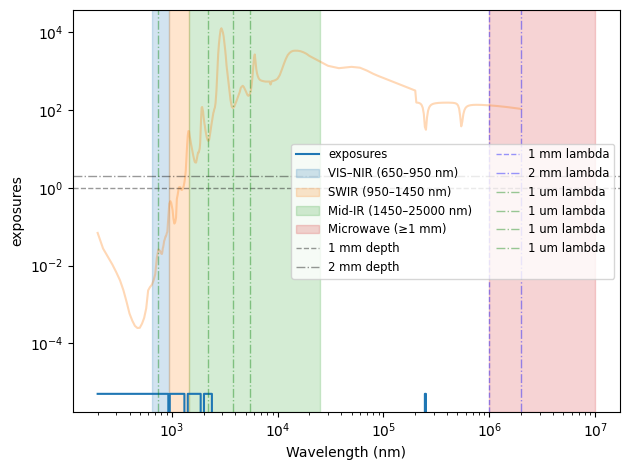

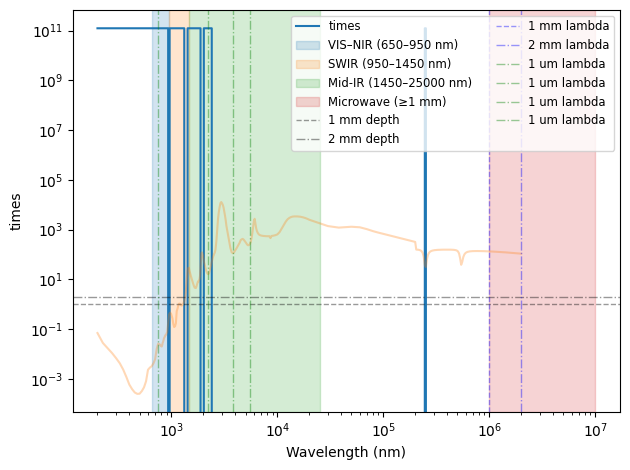

In [123]:
for r in rr:
    plot_spectrum(r[1], label=r[0])


In [124]:
import os
from concurrent.futures import ProcessPoolExecutor, as_completed
# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)


arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 16

tau_brain = 2

#           1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count()   # e.g. 16 on a 8‑core/16‑thread machine
print(f"Detected {max_workers} logical CPUs")
amplitude_grid = np.logspace(18, 25, 6)
pulse_freq_grid = np.logspace(3, 9, 6)
pulse_duration_grid= np.logspace(-14, -9, 6)
# 2. Build the list of argument‑dicts you want to map:
tasks = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    tasks.append({
        'wavelength': wavelength,
        'amplitude_grid': amplitude_grid,
        'mu_a_brain': mu_water * 100,
        'mu_s_brain_p': 7 * 100,
        'pulse_freq_grid': pulse_freq_grid,
        'pulse_duration_grid': pulse_duration_grid,
        'skull': True,
        'mu_a_skull': mu_skull * 100,
        'mu_s_skull_p': 7 * 100,
        'skull_thickness_mm': 5.5,
        'NEP': 1e-13,
        'arrhenius_threshold': arrhenius_threshold,
        'arrhenius_threshold_pulse': arrhenius_threshold_pulse,
        'max_stimulation_per_trial': max_stimulation_per_trial,
        'tau_brain': tau_brain,
        'verbose': False,
        'num_loops': len(water_skull_data['lambda'])
    })



# 3. Spawn a pool of worker processes:
with ProcessPoolExecutor(max_workers=14) as executor:
    futures = [executor.submit(optimize_pulse_schedule, **kw) for kw in tasks]

    results = []
    for future in as_completed(futures):
        try:
            results.append(future.result())
        except Exception as e:
            print("Worker raised:", e)


depths = [result['max_depth_mm'] for result in results]

res_0 = [result['res_0_depth'][0] for result in results]
res_04 = [result['res_04_depth'][0] for result in results]
res_max = [result['res_max_depth'][0] for result in results]

res_0_inf = [result['res_0_depth'][1] for result in results]
res_04_inf = [result['res_04_depth'][1] for result in results]
res_max_inf = [result['res_max_depth'][1] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]


rr = [['depths',depths], ['res_0',res_0], ['res_0_inf',res_0_inf], ['res_04',res_04],['res_04_inf',res_04_inf],
       ['res_max',res_max],['res_max_inf',res_max_inf],   ['exposures',exposures], ['times',times]]

Detected 16 logical CPUs


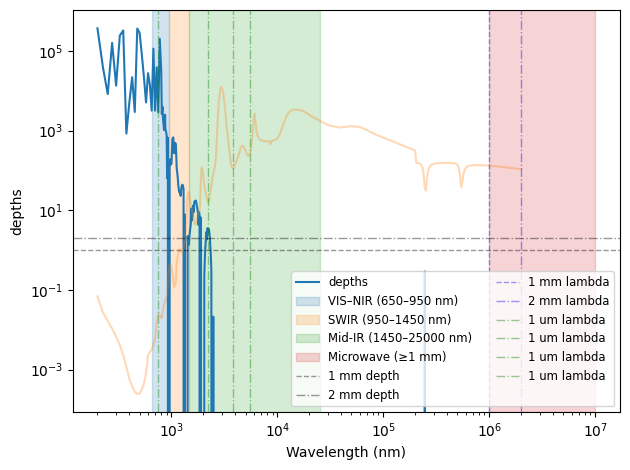

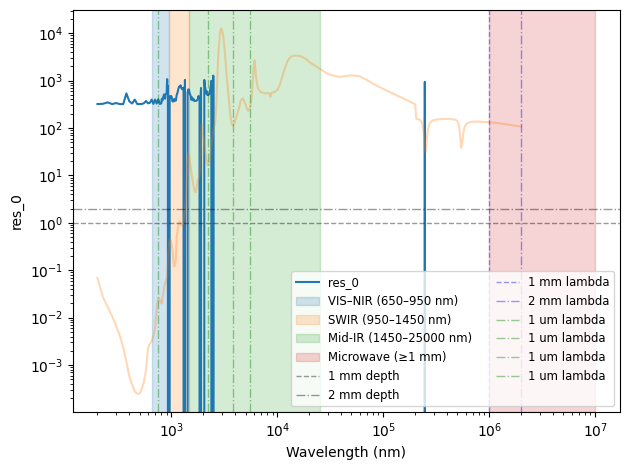

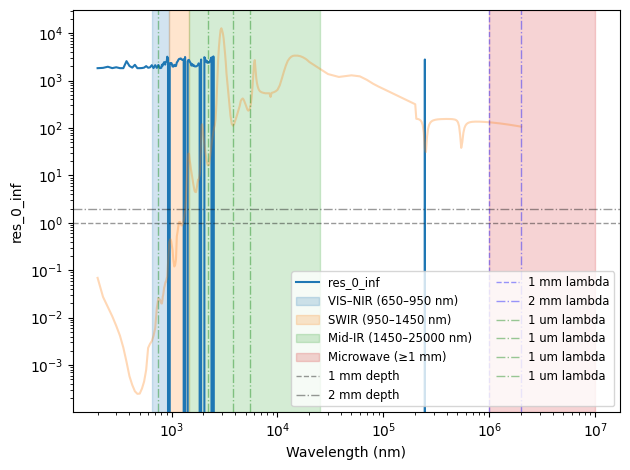

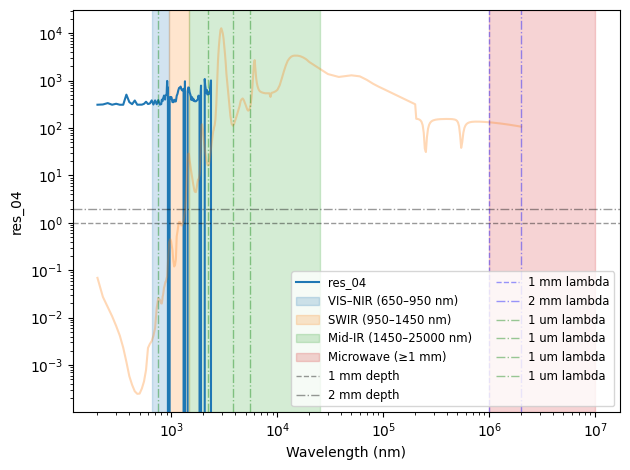

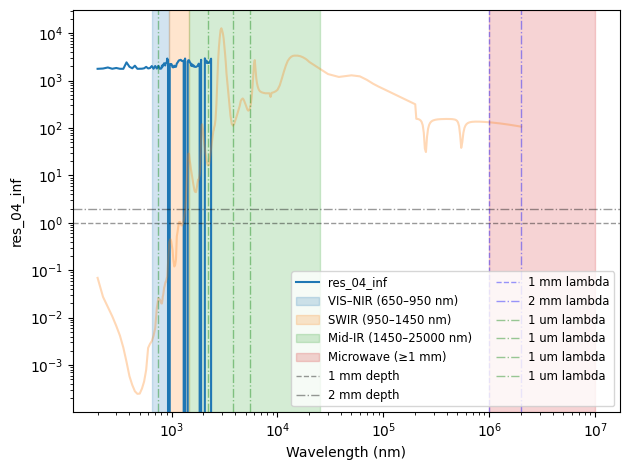

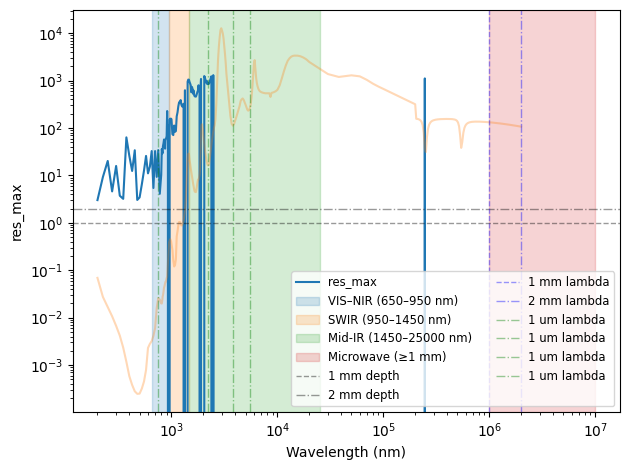

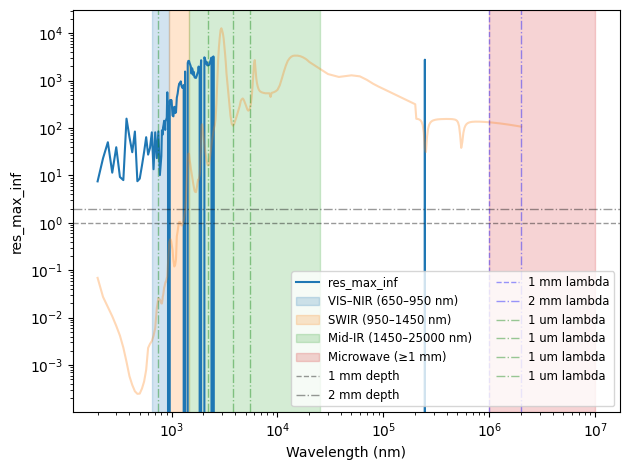

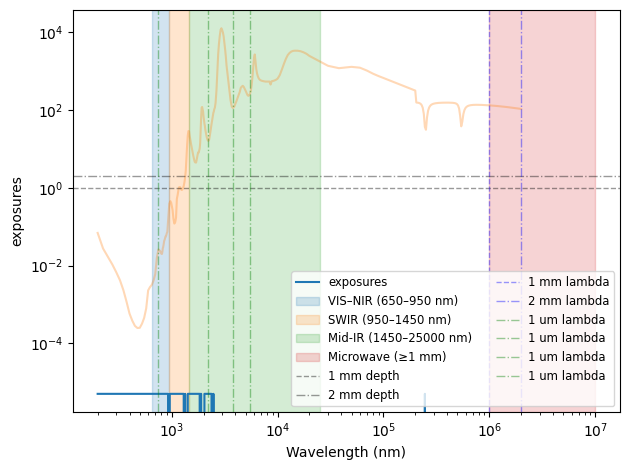

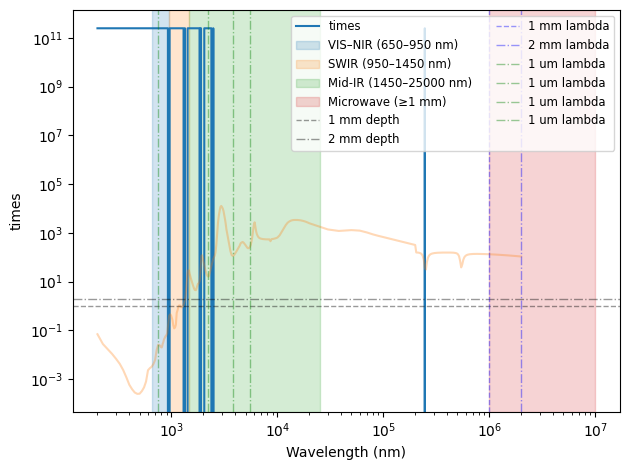

In [125]:
for r in rr:
    plot_spectrum(r[1], label=r[0])


In [60]:
depths

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

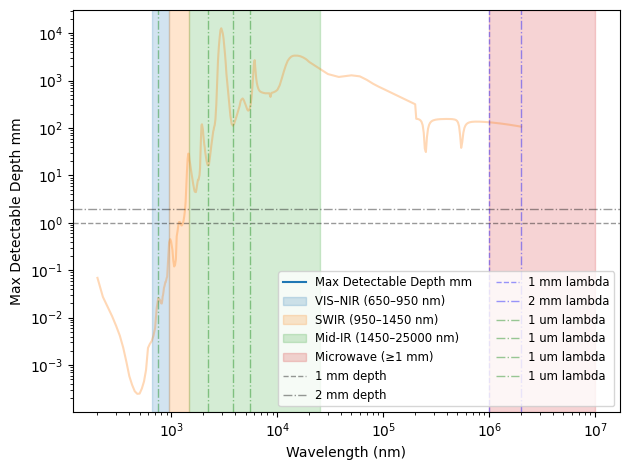

In [59]:

plot_spectrum(depths)